In [1]:
import logging
import sys

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import cstrees.cstree as ct
import cstrees.stage as st

%load_ext autoreload
%autoreload 2
# logging.basicConfig(stream=sys.stderr, level=logging.ERROR)
logging.basicConfig(stream=sys.stderr, level=logging.CRITICAL)

/Users/liamsolus/Dropbox/Research/alg-stat/graphical-models/CStrees/ICSlearn/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
run icslearn.py

In [4]:
run icslearn_simulations.py

Example: generating a sample of size 40000 from a random interventional CStree on 6 binary variables with one interventional experiment.  The proportion of stages of the observational tree that are invariant under the experiment is random with expectation 0.59.

The reported accuracy is the number of observational stages that are correctly estimated to be invariant plus the number of observational stages correctly estimated to be non-invariant divided by the total number of observational stages. 

In [5]:
itree = generate_iCStree(6, sample_size=40000, stage_prop = 0.59)
learned_itree = fit_itree(itree[2], 1, itree[1])
print(acc(learned_itree[0], itree[0], itree[2]))

/Users/liamsolus/Dropbox/Research/alg-stat/graphical-models/CStrees/ICSlearn/.conda/lib/python3.11/site-packages/cstrees/cstree.py:421: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, dftmp])
/Users/liamsolus/Dropbox/Research/alg-stat/graphical-models/CStrees/ICSlearn/.conda/lib/python3.11/site-packages/cstrees/cstree.py:421: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, dftmp])
/Users/liamsolus/Dropbox/Research/alg-stat/graphical-models/CStrees/ICSlearn/.co

1.0


Following experiments vary:

number of variables (6, 10, 20)
stage_prop (0.1, 0.25, 0.5, 0.75, 0.9)
sample size (500, 1000, 10000, 50000)

10 interventional CStree models with one intervention are generated for each combination of the above. The proportion of stages correct in the estimated iCStree is then reported.

6 variables:

In [6]:
seedlist = [i for i in range(10)]
stage_props = [0.1, 0.25, 0.5, 0.75, 0.9]
sample_sizes = [500, 1000, 10000, 50000]
accuracies_6 = []

for j in range(len(stage_props)):
    for n in range(len(sample_sizes)): 

        for i in range(10):
            itree = generate_iCStree(6, sample_size=sample_sizes[n], stage_prop = stage_props[j], seed = seedlist[i])
            learned_itree = fit_itree(itree[2], 1, itree[1])
            accuracies_6 += [[acc(learned_itree[0], itree[0], itree[2]), stage_props[j], sample_sizes[n]]]

resultsarr6 = np.array(accuracies_6)

/Users/liamsolus/Dropbox/Research/alg-stat/graphical-models/CStrees/ICSlearn/.conda/lib/python3.11/site-packages/cstrees/cstree.py:421: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, dftmp])
/Users/liamsolus/Dropbox/Research/alg-stat/graphical-models/CStrees/ICSlearn/.conda/lib/python3.11/site-packages/cstrees/cstree.py:421: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, dftmp])
/Users/liamsolus/Dropbox/Research/alg-stat/graphical-models/CStrees/ICSlearn/.co

In [7]:
resultsdf6 = pd.DataFrame(resultsarr6, columns= ['accuracy', 'proportion of stages not targeted', 'sample size'])
resultsdf6['sample size'] = resultsdf6['sample size'].astype(int)
resultsdf6.head()

,accuracy,proportion of stages not targeted,sample size
0,0.692308,0.1,500
1,0.692308,0.1,500
2,0.500000,0.1,500
3,0.466667,0.1,500
4,0.571429,0.1,500


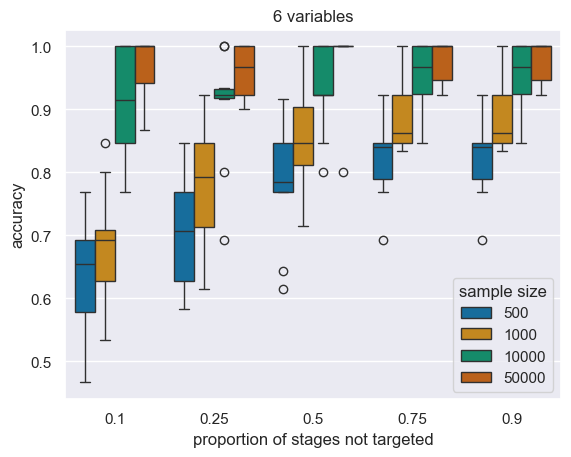

In [8]:
sns.set_theme(style="darkgrid")

plt.figure()
sns.boxplot(data = resultsdf6, 
            x = 'proportion of stages not targeted', 
            y = 'accuracy', 
            hue='sample size',
            palette='colorblind').set(title = '6 variables')

#plt.savefig("p6_icslearn.pdf", bbox_inches='tight')
plt.show()

10 variables:

In [106]:
seedlist = [i for i in range(10)]
stage_props = [0.1, 0.25, 0.5, 0.75, 0.9]
sample_sizes = [500, 1000, 10000, 50000]
accuracies_10 = []

for j in range(len(stage_props)):
    for n in range(len(sample_sizes)): 

        for i in range(10):
            itree = generate_iCStree(10, sample_size=sample_sizes[n], stage_prop = stage_props[j], seed = seedlist[i])
            learned_itree = fit_itree(itree[2], 1, itree[1])
            accuracies_10 += [[acc(learned_itree[0], itree[0], itree[2]), stage_props[j], sample_sizes[n]]]


resultsarr10 = np.array(accuracies_10)

/Users/liamsolus/Dropbox/Research/alg-stat/graphical-models/CStrees/ICSlearn/.conda/lib/python3.11/site-packages/cstrees/cstree.py:421: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, dftmp])
/Users/liamsolus/Dropbox/Research/alg-stat/graphical-models/CStrees/ICSlearn/.conda/lib/python3.11/site-packages/cstrees/cstree.py:421: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, dftmp])
/Users/liamsolus/Dropbox/Research/alg-stat/graphical-models/CStrees/ICSlearn/.co

In [118]:
resultsdf10 = pd.DataFrame(resultsarr10, columns= ['accuracy', 'proportion of stages not targeted', 'sample size'])
resultsdf10['sample size'] = resultsdf10['sample size'].astype(int)
resultsdf10.head()

,accuracy,proportion of stages not targeted,sample size
0,0.592593,0.1,500
1,0.653846,0.1,500
2,0.535714,0.1,500
3,0.655172,0.1,500
4,0.533333,0.1,500


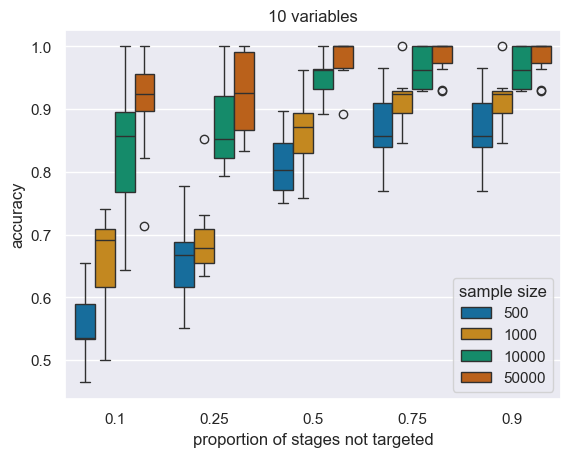

In [ ]:
sns.set_theme(style="darkgrid")

plt.figure()
sns.boxplot(data = resultsdf10, 
            x = 'proportion of stages not targeted', 
            y = 'accuracy', 
            hue='sample size',
            palette='colorblind').set(title = '10 variables')

#plt.savefig("p10_icslearn.pdf", bbox_inches='tight')
plt.show()

20 variables:

In [122]:
seedlist = [i for i in range(10)]
stage_props = [0.1, 0.25, 0.5, 0.75, 0.9]
sample_sizes = [500, 1000, 10000, 50000]
accuracies_20 = []

for j in range(len(stage_props)):
    for n in range(len(sample_sizes)): 

        for i in range(10):
            itree = generate_iCStree(20, sample_size=sample_sizes[n], stage_prop = stage_props[j], seed = seedlist[i])
            learned_itree = fit_itree(itree[2], 1, itree[1])
            accuracies_20 += [[acc(learned_itree[0], itree[0], itree[2]), stage_props[j], sample_sizes[n]]]


resultsarr20 = np.array(accuracies_20)

/Users/liamsolus/Dropbox/Research/alg-stat/graphical-models/CStrees/ICSlearn/.conda/lib/python3.11/site-packages/cstrees/cstree.py:421: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, dftmp])
/Users/liamsolus/Dropbox/Research/alg-stat/graphical-models/CStrees/ICSlearn/.conda/lib/python3.11/site-packages/cstrees/cstree.py:421: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, dftmp])
/Users/liamsolus/Dropbox/Research/alg-stat/graphical-models/CStrees/ICSlearn/.co

In [123]:
resultsdf20 = pd.DataFrame(resultsarr20, columns= ['accuracy', 'proportion of stages not targeted', 'sample size'])
resultsdf20['sample size'] = resultsdf20['sample size'].astype(int)
resultsdf20.head()

,accuracy,proportion of stages not targeted,sample size
0,0.641791,0.1,500
1,0.600000,0.1,500
2,0.545455,0.1,500
3,0.531250,0.1,500
4,0.623188,0.1,500


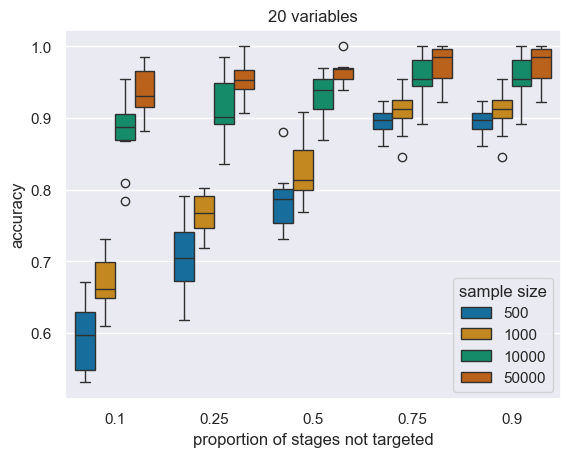

In [ ]:
sns.set_theme(style="darkgrid")

plt.figure()
sns.boxplot(data = resultsdf20, 
            x = 'proportion of stages not targeted', 
            y = 'accuracy', 
            hue='sample size',
            palette='colorblind').set(title = '20 variables')

#plt.savefig("p20_icslearn.pdf", bbox_inches='tight')
plt.show()